# Imports

In [31]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


import json  
import mpl_toolkits
import os
import pickle
import glob
import re
import itertools
from PIL import Image
import time


from skimage import color
from skimage.feature import hog

from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog

import cv2
import argparse as ap


import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from keras.utils import np_utils

import xgboost as xgb
from xgboost import XGBClassifier

import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import callbacks
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras.optimizers import SGD


from skimage.feature import hog
from skimage import data, color, exposure
from sklearn import cross_validation



import pyimagesearch.imutils as imutils
from pyimagesearch.helpers import pyramid
from pyimagesearch.helpers import sliding_window

# Bring in Images

In [3]:
os.listdir("shipsnet_data/shipsnet");
path =r'/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet'
boats = glob.glob(os.path.join(path,'1*.png'))
no_boats = glob.glob(os.path.join(path,'0*.png'))
boats.extend(no_boats)

In [4]:
image_data = []
image_tag = []

def makeImageDataTagArray(files_list):
    positive = re.compile("/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet/1.*")
    negative = re.compile("/Users/mayamidzik/cv/shipsnet/shipsnet_data/shipsnet/0.*")
    for i in files_list:
        if positive.match(i):
            image_tag.append(1)
        if negative.match(i):
            image_tag.append(0)
        img = Image.open(i)
        arr = np.array(img)
        image_data.append(arr)
        
makeImageDataTagArray(boats)

# Run initial CNN

CNN modeled after

In [5]:
X = np.asarray(image_data)
y = np.asarray(image_tag)

In [6]:
X = X/ 255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234, stratify = y, shuffle = True)

In [8]:
# output encoding
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [9]:
np.random.seed(42)

In [10]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [11]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 1792 samples, validate on 448 samples
Epoch 1/18
 - 16s - loss: 0.4735 - acc: 0.7902 - val_loss: 0.3178 - val_acc: 0.9018
Epoch 2/18
 - 16s - loss: 0.2836 - acc: 0.8761 - val_loss: 0.2130 - val_acc: 0.9107
Epoch 3/18
 - 16s - loss: 0.2233 - acc: 0.9057 - val_loss: 0.1835 - val_acc: 0.9397
Epoch 4/18
 - 16s - loss: 0.1904 - acc: 0.9241 - val_loss: 0.1411 - val_acc: 0.9397
Epoch 5/18
 - 16s - loss: 0.1656 - acc: 0.9369 - val_loss: 0.1346 - val_acc: 0.9531
Epoch 6/18
 - 15s - loss: 0.1586 - acc: 0.9386 - val_loss: 0.1226 - val_acc: 0.9531
Epoch 7/18
 - 15s - loss: 0.1470 - acc: 0.9420 - val_loss: 0.1254 - val_acc: 0.9531
Epoch 8/18
 - 15s - loss: 0.1302 - acc: 0.9509 - val_loss: 0.1598 - val_acc: 0.9420
Epoch 9/18
 - 15s - loss: 0.1266 - acc: 0.9503 - val_loss: 0.0920 - val_acc: 0.9643
Epoch 10/18
 - 16s - loss: 0.1131 - acc: 0.9565 - val_loss: 0.1212 - val_acc: 0.9531
Epoch 11/18
 - 15s - loss: 0.0996 - acc: 0.9581 - val_loss: 0.0930 - val_acc: 0.9598
Epoch 12/18
 - 14s - loss: 

# Sliding Window Test

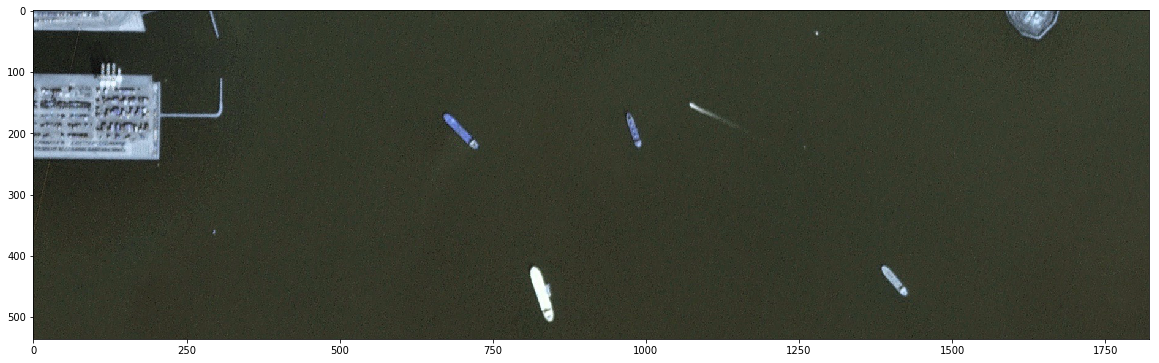

In [36]:
scene = cv2.imread('shipsnet_data/scenes/lb_1_crop.jpg')
scene_full = cv2.imread('shipsnet_data/scenes/lb_1.jpg')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(scene)

In [41]:
def scan_image(model,image):
    (winW, winH) = (80, 80)
    output = []
    cnn_windows = []
    cnn_coords = []
    i = 0
    for (x, y, window) in sliding_window(image, stepSize=12, windowSize=(winW, winH)):
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        cnn_window = np.expand_dims(window, axis=0)
        y_pred = model.predict(cnn_window)
        y_pred_val = list(y_pred[0])[0]
        if y_pred_val == 0.0 :
            cnn_coords.append((x,y))
            cnn_windows.append(window)
        i+=1
    output.append(cnn_windows)
    output.append(cnn_coords)
    return output

In [38]:
def plot_found(cnn_coords,image):
    plt.rcParams["figure.figsize"] = (20,10)

    fig,ax = plt.subplots(1)
    ax.imshow(image)

    for i in cnn_coords:
        rect = patches.Rectangle(i,80,80,linewidth=4,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()
    

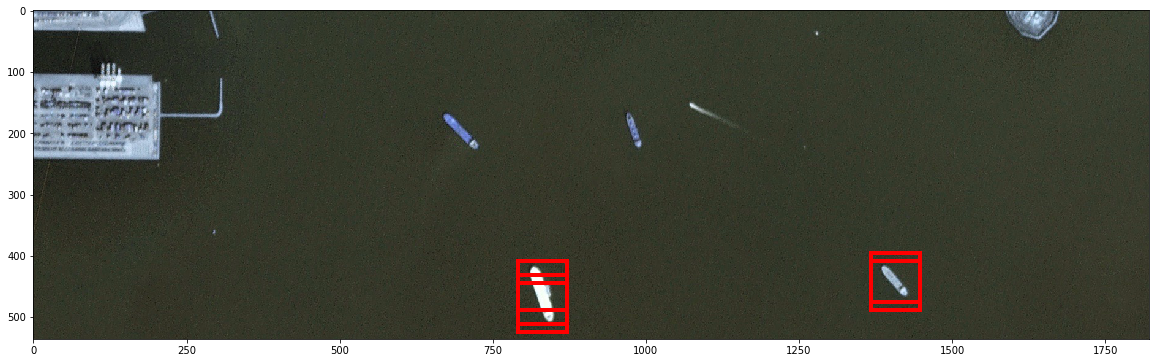

In [39]:
plot_found(output[1],scene)

# CNN with datagen step

In [18]:
np.random.seed(42)

# network design
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(2, activation='softmax'))



In [43]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly3 flip images

In [44]:
datagen.fit(X_train)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=18,verbose=2)

# training
# model2.fit(
#     X_train, 
#     y_train,
#     batch_size=32,
#     epochs=18,
#     validation_split=0.2,
#     shuffle=True,
#     verbose=2)

Epoch 1/18
 - 19s - loss: 0.5121 - acc: 0.7808
Epoch 2/18
 - 18s - loss: 0.4127 - acc: 0.8187
Epoch 3/18
 - 17s - loss: 0.3944 - acc: 0.8228
Epoch 4/18


In [40]:
model2_output = scan_image(model2,scene)

boat?
boat?
boat?
boat?
boat?
boat?


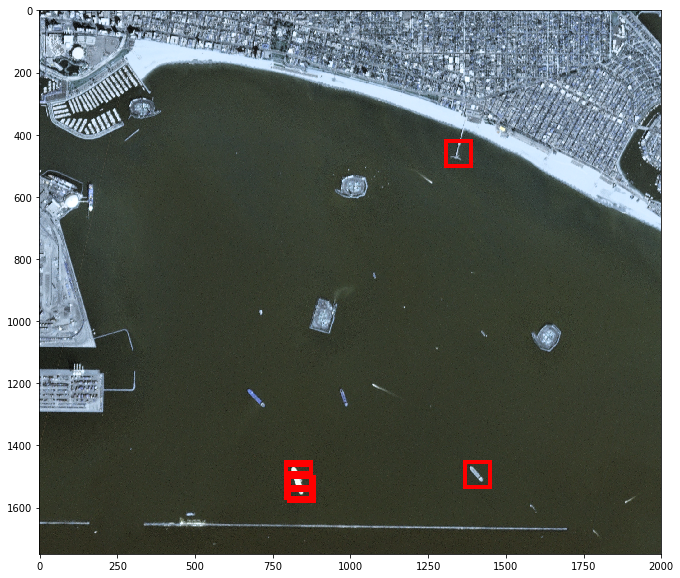

In [42]:
plot_found(model2_output[1],scene)